In [78]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import dot, cos, sin, cross, pi


### Rodriguez rotation

In [79]:
def Rodriguez_rotate(vector, angle, rot_axis, unit="deg"):
    # Ensure rotation axis is defined by a unit vector
    vector = np.array(vector, dtype=float)
    rot_axis = np.array(rot_axis, dtype=float)
    rot_axis /= np.linalg.norm(rot_axis)

    # Ensure angle is in radians
    if unit == "deg":
        angle *= pi/180.0
    elif unit != "rad":
        raise ValueError(f"{unit} is not a valid angle unit. Pick either \"deg\" or \"rad\".")
    
    rotated_vector = vector * cos(angle) \
                    + cross(rot_axis, vector)*sin(angle) \
                    + rot_axis * dot(rot_axis, vector) * (1 - cos(angle))
    return rotated_vector

Rodriguez_rotate([0,0,1], 10, [1,0,0])

array([ 0.        , -0.17364818,  0.98480775])

In [89]:
import plotly.graph_objects as go
import pandas as pd

# df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/vortex.csv")
x, y, z = np.meshgrid(np.arange(0,5,1), np.arange(0,5,1), np.arange(0,5,1))

u = np.ones(shape=x.shape)
v = np.zeros(shape=y.shape)
w = np.zeros(shape=z.shape)

def flatten_vf(x, y, z, u, v, w):
    return x.flatten(), y.flatten(), z.flatten(), u.flatten(), v.flatten(), w.flatten()

x, y, z, u, v, w=flatten_vf(x,y,z,u,v,w)

init_vectors = np.array(list(zip(u,v,w)))
rand_axes = (np.random.rand(2, len(init_vectors)) - 0.5) * 2
rand_axes = rand_axes.T
zeros = np.array([0]*rand_axes.shape[0])
rand_axis_vectors = np.vstack([zeros, rand_axes]).T

# rotated_vectors = np.array([Rodriguez_rotate(init_vectors[i, :], np.random.random()*180, rand_axes[i, :]) for i in range(len(init_vectors[:, 0]))])
# init_vectors[0]
rand_axes[0, :]

array([-0.57700631,  0.7414048 , -0.87545677,  0.88076319, -0.97408135,
        0.28606593, -0.65247751, -0.25666394,  0.04567585, -0.10855143,
       -0.87506716, -0.36462113, -0.73003564,  0.7301719 ,  0.96103697,
       -0.91917964,  0.8802714 ,  0.01958152,  0.511663  ,  0.95898654,
       -0.93330544, -0.6283271 , -0.88491823, -0.02456525, -0.02280597,
        0.64344089,  0.98710257,  0.82127696, -0.90668817,  0.14541718,
        0.64506995, -0.96873479, -0.98940112,  0.58348137,  0.43760564,
        0.078417  , -0.65495321,  0.85225068, -0.428261  ,  0.92439524,
       -0.3151319 , -0.37035827,  0.76269156, -0.26287988,  0.07796921,
        0.90165362, -0.81371781, -0.41395276,  0.71795276,  0.66517182,
       -0.62138387,  0.84758937, -0.06535927,  0.66598443,  0.32827333,
       -0.71277125,  0.03502453, -0.38488725, -0.21395559,  0.71222669,
        0.56823558,  0.72959053, -0.83569904,  0.9960775 , -0.57856286,
       -0.56923416, -0.3797477 , -0.38959569,  0.47024282,  0.24

In [81]:

fig = go.Figure(data = go.Cone(
    x=x,
    y=y,
    z=z,
    u=init_vectors[:, 0],
    v=init_vectors[:, 1],
    w=init_vectors[:, 2],
    colorscale='Blues',
    sizemode="absolute",
    sizeref=0.4, 
    opacity=0.5))

fig.add_trace(go.Cone(
    x=x,
    y=y,
    z=z,
    u=rand_axis_vectors[:, 0],
    v=rand_axis_vectors[:, 1],
    w=rand_axis_vectors[:, 2],
    colorscale='Reds',
    sizemode="absolute",
    sizeref=0.3))

fig.update_layout(scene=dict(aspectratio=dict(x=1, y=1, z=0.8),
                             camera_eye=dict(x=1.2, y=1.2, z=0.6)))

fig.show()

In [75]:
import plotly.graph_objs as go
import chart_studio.plotly as py
import plotly.tools as tls
import plotly.figure_factory as ff

x, y, z = np.meshgrid(np.arange(0,10,1), np.arange(0,10,1), np.arange(0,10,1))

u = np.ones(shape=x.shape)
v = np.zeros(shape=y.shape)
w = np.zeros(shape=z.shape)

def flatten_vf(x, y, z, u, v, w):
    return x.flatten(), y.flatten(), z.flatten(), u.flatten(), v.flatten(), w.flatten()

x, y, z, u, v, w=flatten_vf(x,y,z,u,v,w)

pl_deep = [[0.0, 'rgb(39, 26, 44)'],
           [0.1, 'rgb(53, 41, 74)'],
           [0.2, 'rgb(63, 57, 108)'],
           [0.3, 'rgb(64, 77, 139)'],
           [0.4, 'rgb(61, 99, 148)'],
           [0.5, 'rgb(65, 121, 153)'],
           [0.6, 'rgb(72, 142, 157)'],
           [0.7, 'rgb(80, 164, 162)'],
           [0.8, 'rgb(92, 185, 163)'],
           [0.9, 'rgb(121, 206, 162)'],
           [1.0, 'rgb(165, 222, 166)']]

trace2 = dict(type='cone',
              x=x,
              y=y,
              z=z,
              u=u,
              v=v,
              w=w,
              sizemode='scaled',
              sizeref=0.25, #this is the default value 
              showscale=True,
              colorscale=pl_deep, 
              colorbar=dict(thickness=20, ticklen=4), 
              anchor='tail'
          )


### uniform unit vector generation

In [ ]:
# Read data from a csv
import plotly.express as px

N = 2000
xs = (np.random.random(N) - 0.5) * 2
ys = (np.random.random(N) - 0.5) * 2
zs = (np.random.random(N) - 0.5) * 2
xs = (np.random.normal(0, 1, N))
ys = (np.random.normal(0, 1, N))
zs = (np.random.normal(0, 1, N))

random_vectors = np.array([xs, ys, zs]).T
random_unit_vectors = np.zeros(shape=random_vectors.shape)
for i in range(random_vectors.shape[0]):
    random_unit_vectors[i] = random_vectors[i] / np.linalg.norm(random_vectors[i])

df = pd.DataFrame(random_unit_vectors, columns=["X", "Y", "Z"])

fig = px.scatter_3d(df, x='X', y='Y', z='Z', color='Z')
fig.show()

In [ ]:
from numpy import random, sqrt, log, sin, cos, pi

def box_muller_sample(n=1):
    
    u1 = random.rand(n)
    u2 = random.rand(n)
    
    r = sqrt(-2*log(u1))
    x = cos(2*pi*u2)
    y = sin(2*pi*u2)
    z1 = r*x
    z2 = r*y
    
    return z1, z2

In [ ]:
N = 2000
rand_norms_x = box_muller_sample(N)[0] + box_muller_sample(N)[1]
rand_norms_y = box_muller_sample(N)[0] + box_muller_sample(N)[1]
rand_norms_z = box_muller_sample(N)[0] + box_muller_sample(N)[1]

In [ ]:
df = pd.DataFrame({"X": rand_norms_x, "Y": rand_norms_y, "Z": rand_norms_z})
df["magnitude"] = df.apply(lambda x: np.linalg.norm(np.array(x)), axis=1)
df_normed = df.iloc[:, :3].divide(df.iloc[:, -1], axis=0)
df_normed["magnitude"] = df_normed.apply(lambda x: np.linalg.norm(np.array(x)), axis=1)
df_normed
# df = pd.DataFrame(random_unit_vectors, columns=["X", "Y", "Z"])

fig = px.scatter_3d(df_normed, x='X', y='Y', z='Z', color='Z')
fig.show()

In [ ]:
u1 = random.rand(1)
sqrt(-2*log(u1))

array([1.30630578])

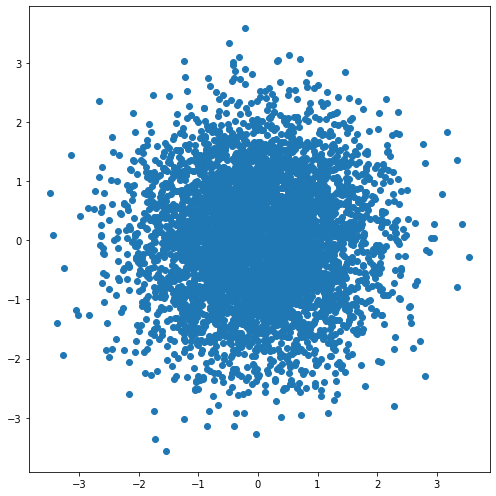

In [ ]:
x1, x2 = box_muller_sample(5000)
x = np.concatenate([x1,x2])
plt.scatter(x1, x2)

In [ ]:
np.random.rand()

0.35366127979981354